# Practice notebook for confidence intervals using NHANES data

This notebook will give you the opportunity to practice working with confidence intervals using the NHANES data.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [257]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

da = pd.read_csv("""..\\..\\nhanes_2015_2016.csv""")

## Question 1

Restrict the sample to women between 35 and 50, then use the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to partition this sample into two groups - women who are currently married, and women who are not currently married.  Within each of these groups, calculate the proportion of women who have completed college.  Calculate 95% confidence intervals for each of these proportions.

In [258]:
# enter your code here
da['DMDMARTLx'] = da['DMDMARTL'].replace({1: 'Married', 2:'Widowed', 3:'Divorced', 4:'Separated', 5:'Never married', 6:'Living with partner', 77:np.nan, 99:np.nan})

da['DMDMARTLm'] = da['DMDMARTL'].replace(to_replace={2,3,4,5,6,77,99}, value="Not married")
da['DMDMARTLm'] = da['DMDMARTLm'].replace({1: 'Married'})
       
da['DMDEDUC2x'] = da['DMDEDUC2'].replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
da['RIAGENDRx'] = da['RIAGENDR'].replace({1: "Male", 2: "Female"})

da['SMQ020x'] = da['SMQ020'].replace({1:'Yes', 2:'No', 7:np.nan, 9:np.nan})

da['agegrp'] = pd.cut(da['RIDAGEYR'],[15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80])
da['agegrp height'] = pd.cut(da['RIDAGEYR'],[18, 28, 38, 48, 58, 68, 80])

print('Total na values: ',da.isnull().sum().sum(),'\n','Original shape: :',da.shape,'\n')

dw = da[((da['RIDAGEYR'] >= 35) & (da['RIDAGEYR'] <= 50)) & (da['RIAGENDRx'] == 'Female')].dropna()
dwg = dw.groupby(['DMDMARTLm'])['DMDEDUC2x'].value_counts().unstack()

dwg.loc['Married','Total'] = np.sum(dwg.loc['Married'])
dwg.loc['Not married','Total'] = np.sum(dwg.loc['Not married'])

dwg.loc['Married','College Proportion'] = dwg.loc['Married','College']/dwg.loc['Married','Total']
dwg.loc['Not married','College Proportion'] = dwg.loc['Not married','College']/dwg.loc['Not married','Total']
dwg.loc['Married','std'] = np.sqrt((dwg.loc['Married','College Proportion'] *(1-dwg.loc['Married','College Proportion'] ))/dwg.loc['Married','Total'])
dwg.loc['Not married','std'] = np.sqrt((dwg.loc['Not married','College Proportion'] *(1-dwg.loc['Not married','College Proportion'] ))/dwg.loc['Not married','Total'])

dwg['lcb'] = dwg.loc[:, 'College Proportion'] - (1.96 * dwg.loc[:, 'std'])
dwg['ucb'] = dwg.loc[:, 'College Proportion'] + (1.96 * dwg.loc[:, 'std'])
print('Total na values: ',dw.isnull().sum().sum(),'\n','After dropping na values shape: :',dw.shape)
pd.set_option('display.float_format','{:.3f}'.format)
pd.set_option('display.width',120)
dwg
#pd.reset_option('display.float_format')


Total na values:  12587 
 Original shape: : (5735, 35) 

Total na values:  0 
 After dropping na values shape: : (61, 35)


DMDEDUC2x,9-11,College,HS/GED,Some college/AA,Total,College Proportion,std,lcb,ucb
DMDMARTLm,,,,,,,,,
Married,1,17,2,14,34.000,0.500,0.086,0.332,0.668
Not married,2,9,5,11,27.000,0.333,0.091,0.156,0.511


__Q1a.__ Identify which of the two confidence intervals is wider, and explain why this is the case. 

The confidence interval of the not married female is wider as the standard error is larger than the one from the married group. The distribution in the Married group is concentrated around the females that went to college

__Q1b.__ Write 1-2 sentences summarizing these findings for an audience that does not know what a confidence interval is (the goal here is to report the substance of what you learned about how marital status and educational attainment are related, not to teach a person what a confidence interval is).

With 95% confidence with a sample of 34 women  we can say that the population proportion of married women who have terminated college lies between 33% and 66%.
With 95% confidence with a sample of 27 women  we can say that the population proportion of not married women who have terminated college lies between 15% and 51%.

## Question 2

Construct a 95% confidence interval for the proportion of smokers who are female. Construct a 95% confidence interval for the proportion of smokers who are male. Construct a 95% confidence interval for the **difference** between those two gender proportions.

In [259]:
# enter your code here

dsg = da.groupby(['RIAGENDRx'])['SMQ020x'].value_counts().unstack()
dsg
dsg.loc['Female', 'Total'] = np.sum(dsg.loc['Female'])
dsg.loc['Male', 'Total'] = np.sum(dsg.loc['Male'])

dsg['Yes Proportion'] = dsg['Yes']/dsg['Total']
dsg['Std error'] = np.sqrt((dsg['Yes Proportion']*(1-dsg['Yes Proportion']))/dsg['Total'])

dsg.loc['Difference','Yes Proportion'] = dsg.loc['Female','Yes Proportion'] - dsg.loc['Male','Yes Proportion']
dsg.loc['Difference','Std error'] = np.sqrt(dsg.loc['Female','Std error']**2 + dsg.loc['Male','Std error']**2)

dsg['lcb'] = dsg['Yes Proportion'] - (1.96 * dsg['Std error'])
dsg['ucb'] = dsg['Yes Proportion'] + (1.96 * dsg['Std error'])

dsg

SMQ020x,No,Yes,Total,Yes Proportion,Std error,lcb,ucb
RIAGENDRx,,,,,,,
Female,2066.000,906.000,2972.000,0.305,0.008,0.288,0.321
Male,1340.000,1413.000,2753.000,0.513,0.010,0.495,0.532
Difference,NaN,NaN,NaN,-0.208,0.013,-0.233,-0.183


__Q2a.__ Why might it be relevant to report the separate gender proportions **and** the difference between the gender proportions?

The proportion of females that smoke is 20% less than the male that smoke.
The standard error from the female population is also slightly smaller than the one from the male population. Although both standard errors are relatively small. This is due to the fact that the samples are quite big.
With 95% confidence we can say that the difference between female proportion that smoke and the male proportion that smoke is within -.23 and -.183 using a combined sample of more than 5K~. It is unlikely that the difference in the populations proportion is zero as this is not a number in the confidence interval

__Q2b.__ How does the **width** of the confidence interval for the difference between the gender proportions compare to the widths of the confidence intervals for the separate gender proportions?

The width of the confidence interval of the original proportions is bigger than the confidence interval of the difference of the proportions. That is because we are taking into account the standard errors of the original proportions.

## Question 3

Construct a 95% interval for height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)) in centimeters.  Then convert height from centimeters to inches by dividing by 2.54, and construct a 95% confidence interval for height in inches.  Finally, convert the endpoints (the lower and upper confidence limits) of the confidence interval from inches to back to centimeters   

In [260]:
# enter your code here
da['BMXHT'].isnull().sum()
dh = da['BMXHT'].dropna() / 2.54
dhg = dh.describe()
dhg['lcb cm'] = dhg['mean']-(1.96 * (dhg['std']/np.sqrt(dhg['count'])))
dhg['ucb cm'] = dhg['mean']+(1.96 * (dhg['std']/np.sqrt(dhg['count'])))
dhg['lcb in'] = dhg['lcb cm']*2.54
dhg['ucb in'] = dhg['ucb cm']*2.54

dhg

count    5673.000
mean       65.411
std         3.968
min        51.063
25%        62.480
50%        65.354
75%        68.307
max        79.803
lcb cm     65.307
ucb cm     65.514
lcb in    165.881
ucb in    166.405
Name: BMXHT, dtype: float64

__Q3a.__ Describe how the confidence interval constructed in centimeters relates to the confidence interval constructed in inches.

The confidence interval constructed in centimeters is only escalated when converted to inches however the width is exactly the same.

## Question 4

Partition the sample based on 10-year age bands, i.e. the resulting groups will consist of people with ages from 18-28, 29-38, etc. Construct 95% confidence intervals for the difference between the mean BMI for females and for males within each age band.

In [261]:
# enter your code here
dbg = da.groupby(['RIAGENDRx','agegrp height'])['BMXBMI'].agg(['count', 'mean', np.std])
dbg['std error'] = dbg['std']/np.sqrt(dbg['count'])
dbg_diff = dbg.loc['Female','mean'] - dbg.loc['Male','mean']
dbg_diff = pd.DataFrame(data=dbg_diff)
dbg_diff.columns=['mean_diff']
dbg_diff['std error'] = np.sqrt(dbg.loc['Female','std error']**2 + dbg.loc['Male','std error']**2)
dbg_diff['lcb'] = dbg_diff['mean_diff']-(1.96 * dbg_diff['std error'])
dbg_diff['ucb'] = dbg_diff['mean_diff']+(1.96 * dbg_diff['std error'])
dbg_diff

,mean_diff,std error,lcb,ucb
agegrp height,,,,
"(18, 28]",0.961,0.479,0.022,1.901
"(28, 38]",0.246,0.477,-0.690,1.182
"(38, 48]",1.489,0.470,0.567,2.411
"(48, 58]",1.402,0.469,0.482,2.322
"(58, 68]",1.822,0.457,0.927,2.717
"(68, 80]",1.157,0.378,0.416,1.898


__Q4a.__ How do the widths of these confidence intervals differ?  Provide an explanation for any substantial diferences in the confidence interval widths that you see.

The difference depends on the standard error, the higher the std error is the wider the interval would be.

## Question 5

Construct a 95% confidence interval for the first and second systolic blood pressure measures, and for the difference between the first and second systolic blood pressure measurements within a subject.

In [263]:
# enter code here
dsp = da[['BPXSY1','BPXSY2']].dropna()
dspg = dsp.describe()
dspg.loc['mean','Difference'] = dspg.loc['mean','BPXSY1'] - dspg.loc['mean','BPXSY2']
dspg.loc['std error'] = dspg.loc['std']/np.sqrt(dspg.loc['count'])
dspg.loc['std error','Difference'] = np.sqrt(dspg.loc['std error','BPXSY1']**2 + dspg.loc['std error','BPXSY2']**2)
dspg.loc['lcb'] = dspg.loc['mean']-(1.96 * dspg.loc['std error'])
dspg.loc['ucb'] = dspg.loc['mean']+(1.96 * dspg.loc['std error'])
dspg

,BPXSY1,BPXSY2,Difference
count,5369.000,5369.000,NaN
mean,125.088,124.413,0.675
std,18.494,18.192,NaN
min,84.000,84.000,NaN
25%,112.000,112.000,NaN
50%,122.000,122.000,NaN
75%,134.000,134.000,NaN
max,236.000,238.000,NaN
std error,0.252,0.248,0.354
lcb,124.594,123.927,-0.019


__Q5a.__ Based on these confidence intervals, would you say that a difference of zero between the population mean values of the first and second systolic blood pressure measures is consistent with the data?

Yes it is, the confidence interval for the systolic blood pressure on the first and second measurement are quite close to each other. This is reflected in the difference confidence interval which has the value of zero. It is quite likely that the difference in means is actually zero as 0 is part of the confidence interval

__Q5b.__ Discuss how the width of the confidence interval for the within-subject difference compares to the widths of the confidence intervals for the first and second measures.

The width of thhe difference confidence interval is wider than the confidence intervals from each systolic blood pressure as is dependent on the combined standard errors of both measures.

## Question 6

Construct a 95% confidence interval for the mean difference between the average age of a smoker, and the average age of a non-smoker.

In [279]:
# insert your code here
dsag = da.groupby(['SMQ020x'])['RIDAGEYR'].agg(['count', 'mean', np.std])
dsag = dsag.rename(columns={"mean": "age mean", "std": "age std"})
dsag['age std error'] = dsag['age std']/np.sqrt(dsag['count'])
dsag.loc['difference','age mean'] = dsag.loc['No','age mean'] - dsag.loc['Yes','age mean'] 
dsag.loc['difference','age std error'] = np.sqrt(dsag.loc['No','age std error']**2 + dsag.loc['Yes','age std error'])
dsag['lcb'] = dsag['age mean'] - (1.96 * dsag['age std error'])
dsag['ucb'] = dsag['age mean'] + (1.96 * dsag['age std error'])
dsag

,count,age mean,age std,age std error,lcb,ucb
SMQ020x,,,,,,
No,3406.000,45.260,18.543,0.318,44.637,45.883
Yes,2319.000,52.097,17.461,0.363,51.386,52.807
difference,NaN,-6.837,NaN,0.681,-8.171,-5.502


__Q6a.__ Use graphical and numerical techniques to compare the variation in the ages of smokers to the variation in the ages of non-smokers.  

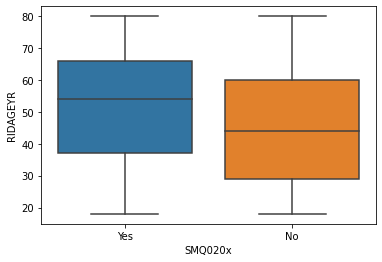

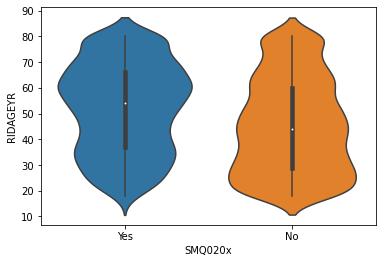

In [274]:
# insert your code here
plt.figure(figsize=(6, 4))
a = sns.boxplot(x=da["SMQ020x"], y=da["RIDAGEYR"])
plt.show()
b = sns.violinplot(x=da["SMQ020x"], y=da["RIDAGEYR"])

__Q6b.__ Does it appear that uncertainty about the mean age of smokers, or uncertainty about the mean age of non-smokers contributed more to the uncertainty for the mean difference that we are focusing on here?

It appears that the uncertainty about the somkers mean contributed more the width of the confidence interval of the difference